## Note: image plotting needs to be done on Princeton Tiger cluster as LAM data and related reruns are present there.

In [1]:
from datetime import datetime
import os
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 7)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

/tmp/ipykernel_230171/3541075480.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import lsst.geom as geom
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay

from pfs.datamodel.pfsConfig import PfsConfig, PfsDesign, FiberStatus, TargetType
from pfs.drp.stella import DetectorMap

from pfs.drp.stella.utils import addPfsCursor, showAllSpectraAsImage, showDetectorMap
from lsst.obs.pfs.utils import getLampElements

import pfs.drp.stella.utils.stability as stability

In [3]:
afwDisplay.setDefaultBackend("matplotlib")
# Overlay mask plane color for ``BAD_FLAT``.
afwDisplay.setDefaultMaskPlaneColor("BAD_FLAT", afwDisplay.CYAN)

In [4]:
import pandas as pd
import matplotlib.dates as mdates

In [5]:
dfsubaru = pd.read_csv('glow-subaru.csv', parse_dates=['taiObs'], index_col=['taiObs'])

In [6]:
dflam = pd.read_csv('glow-lam.csv', parse_dates=['taiObs'], index_col=['taiObs'])

In [7]:
df0 = pd.concat([dfsubaru, dflam])

In [8]:
df0 = df0.sort_values(by=['taiObs'])

In [9]:
df0.to_csv('glow-lam-subaru.csv')

In [10]:
# df = df0[(df0.dataType=='DARK')]

In [11]:
df = df0

## Determine conversion factor for darkRate to electron/s/px and time offset

In [12]:
darkElectrons = 28285.023 # Sum of electrons in dark bbox
darkNpix = 251*51 # n pix in dark bbox
factor = darkElectrons/darkNpix
timeOffset = - np.timedelta64(10, 'h') # HST = GMT-10h

## Plot rates in electrons/s/pix as function of HST time 

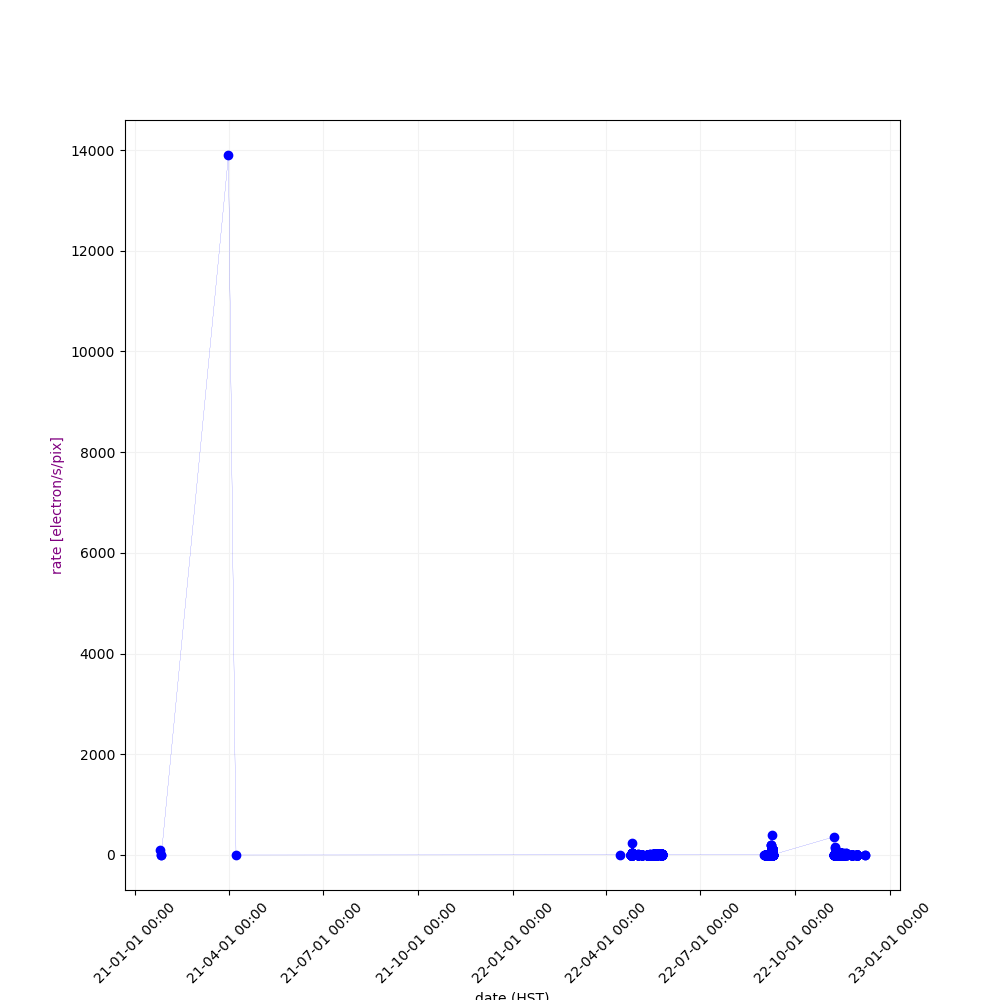

In [13]:
# Create figure and plot space
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.set_ylabel('rate [electron/s/pix]', color='purple')  
ax1.set_xlabel('date (HST)')  
ax1.plot(df.index.values + timeOffset,
        df['rate'] * factor,
        color='blue',
        marker='o',
        linewidth=0.1)

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
plt.grid(color='0.95')
plt.show()

## Plot data in raw rate and taiObs

In [14]:
# # Create figure and plot space
# fig, ax1 = plt.subplots(figsize=(10, 10))

# ax1.set_ylabel('rate [/s]', color='purple')  
# ax1.set_xlabel('date (TAI)')  
# ax1.plot(df.index.values,
#         df['rate'],
#         color='purple',
#         marker='o',
#         linewidth=0.1)

# plt.setp(ax1.get_xticklabels(), rotation=45)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
# plt.grid(color='0.95')
# plt.show()

## Plot data as function of visit

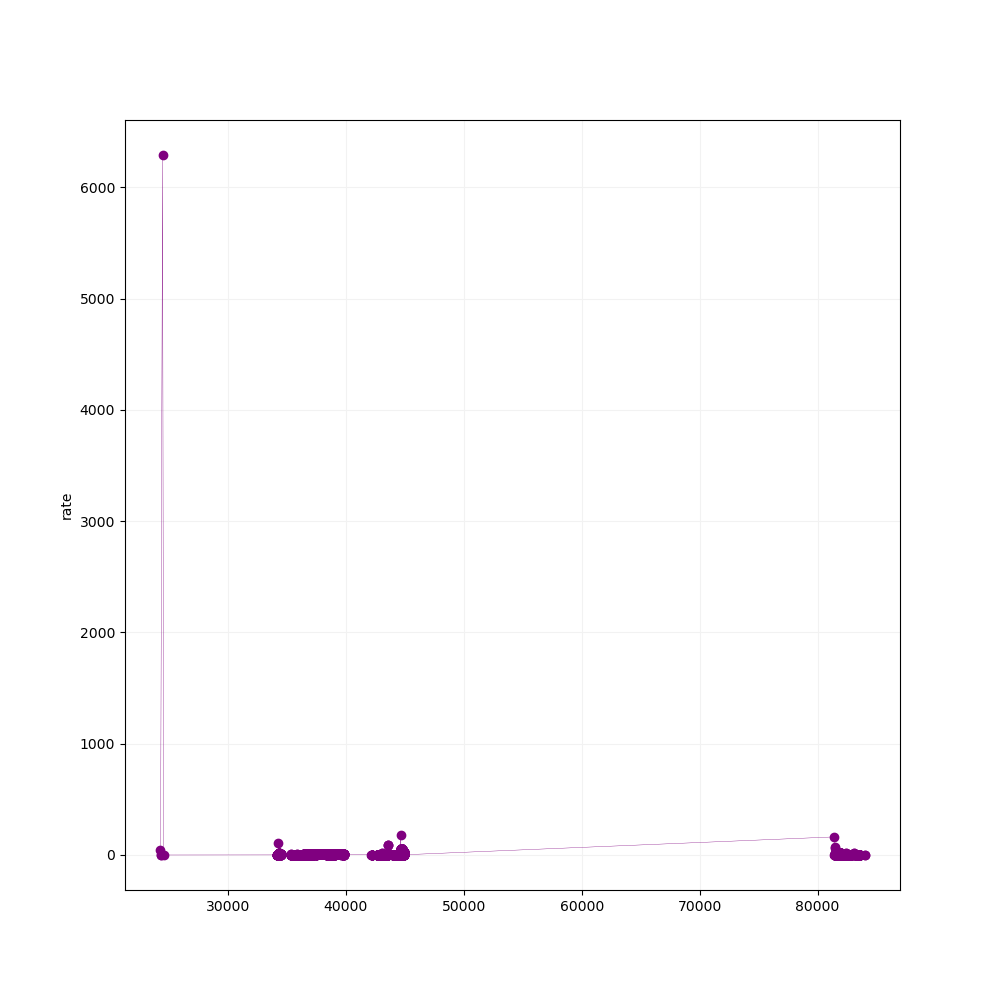

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.set_ylabel('rate')  
ax1.plot(df['visit'], df['rate'], color='purple', marker='o', linewidth=0.25)
plt.grid(color='0.95')
plt.show()

## Look at images

In [16]:
butler = dafPersist.Butler('/projects/HSC/PFS/LAM/rerun/hassans/r3glow/detrend-LAM')

/tmp/ipykernel_230171/2355446652.py:1: FutureWarning: Gen2 Butler has been deprecated (PfsButler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/projects/HSC/PFS/LAM/rerun/hassans/r3glow/detrend-LAM')
/tmp/ipykernel_230171/2355446652.py:1: FutureWarning: Gen2 Butler has been deprecated (PfsMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/projects/HSC/PFS/LAM/rerun/hassans/r3glow/detrend-LAM')


lsst.CameraMapper INFO: Loading exposure registry from /projects/HSC/PFS/LAM/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3


In [17]:
def plotImage(figNum, visit, butler=butler, type="calexp"):
    dataId = dict(visit=visit, arm='r', spectrograph=3)
    exp = butler.get(type, dataId)

    pfsConfig = butler.get("pfsConfig", dataId)
    detMap = butler.get("detectorMap", dataId)
    fig = figNum; plt.close(fig); fig = plt.figure(fig)
    disp = afwDisplay.Display(fig)
    disp.scale('asinh', 'zscale', Q=2)
    disp.mtv(exp, title=f"{'%(visit)d %(arm)s%(spectrograph)d' % dataId}")
    disp.zoom(10, colc=4000, rowc=2836)
    # [geom.BoxI(geom.PointI(4045, 2660), geom.PointI(4095, 2910))]
    disp.line([(4045,2660),(4045,2910),(4095,2910), (4095, 2660), (4045, 2660)])
    addPfsCursor(disp, detMap) 

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


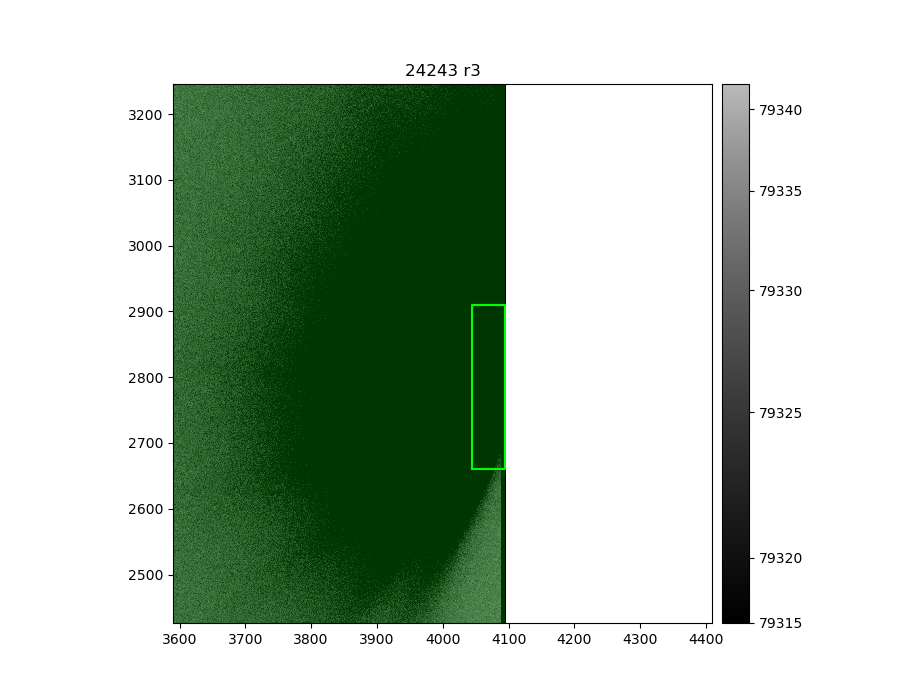

In [18]:
plotImage(11, 24243)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


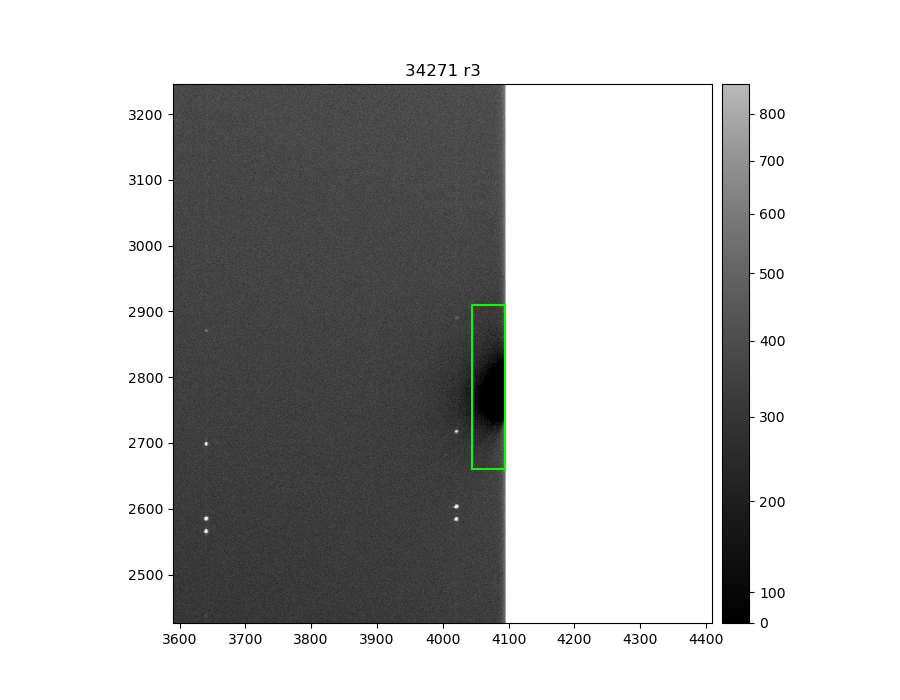

In [19]:
plotImage(12, 34271)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


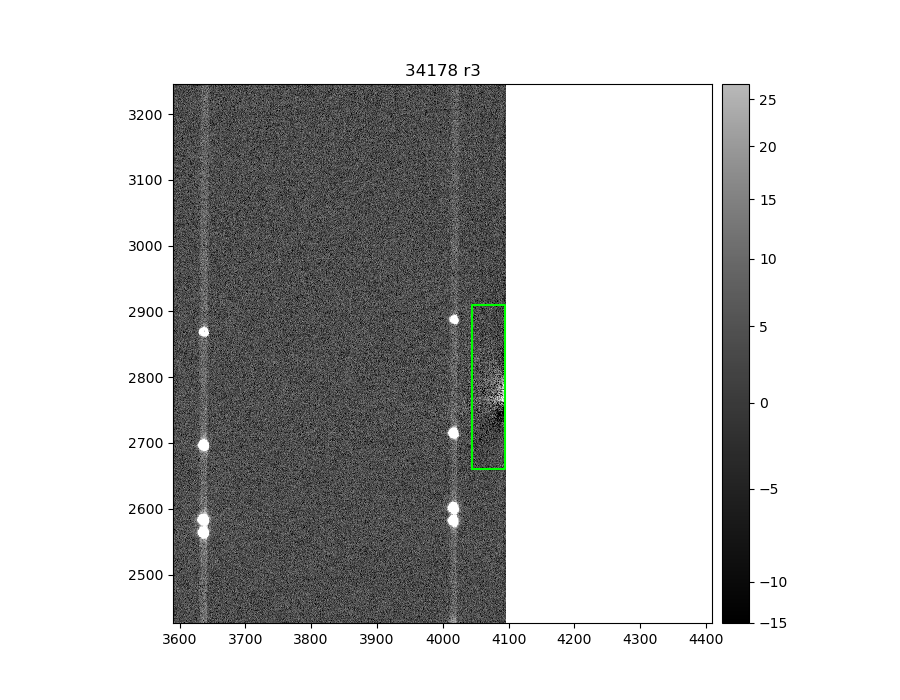

In [20]:
plotImage(13, 34178)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


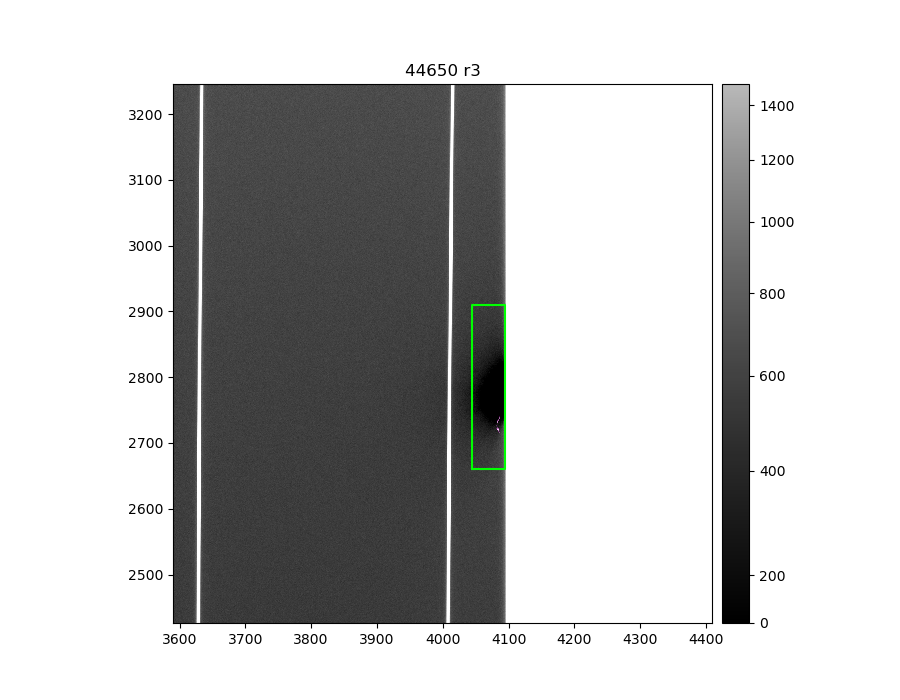

In [22]:
plotImage(14, 44650)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


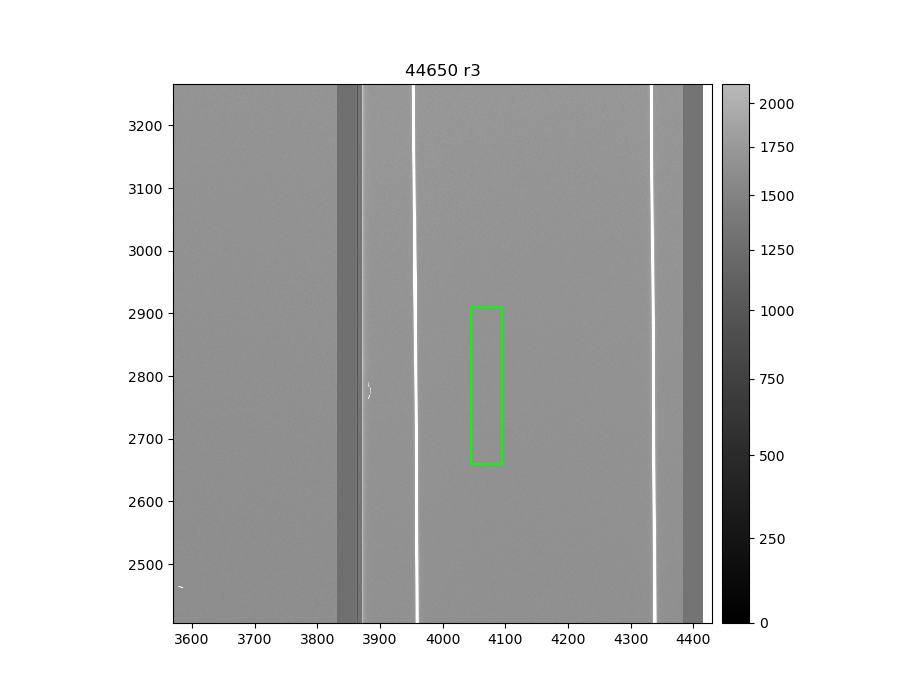

In [23]:
plotImage(15, 44650, type='raw')

In [26]:
butlerS = dafPersist.Butler('/projects/HSC/PFS/Subaru/rerun/hassans/r3glow/detrend')

lsst.CameraMapper INFO: Loading exposure registry from /projects/HSC/PFS/Subaru/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3


/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


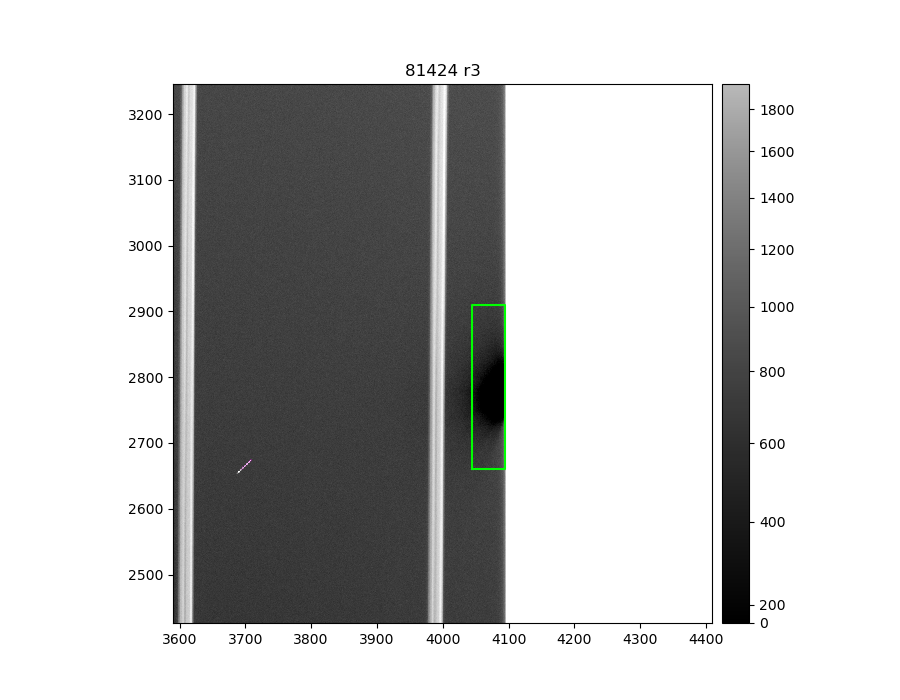

In [27]:
plotImage(16, 81424, butlerS)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


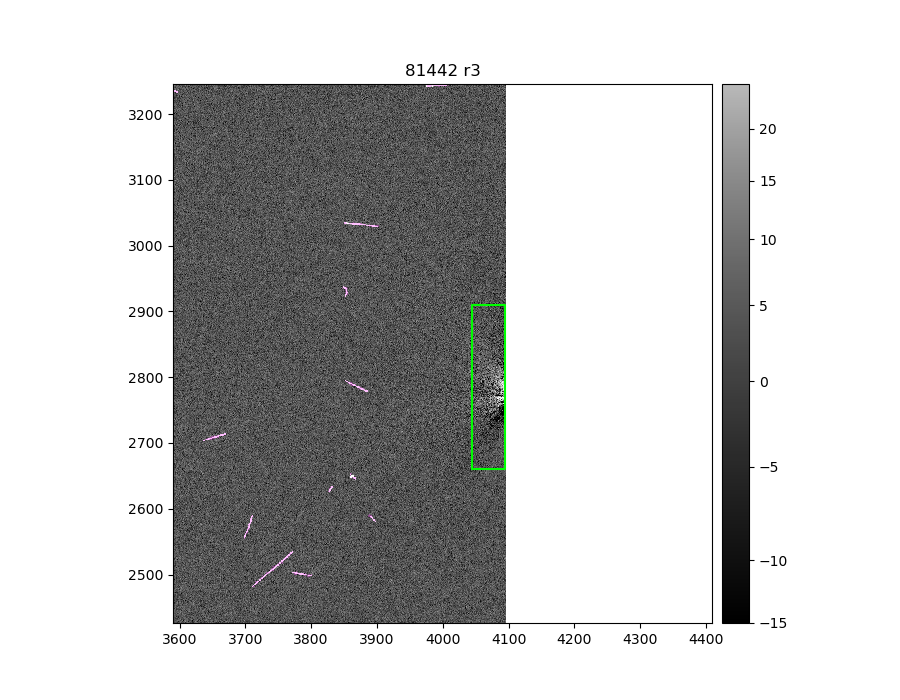

In [28]:
plotImage(17, 81442, butlerS)

In [30]:
butlerLamNoDark = dafPersist.Butler('/projects/HSC/PFS/LAM/rerun/hassans/r3glow/detrend-LAM-24243-nodark/')

lsst.CameraMapper INFO: Loading exposure registry from /projects/HSC/PFS/LAM/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3


AssertionError: minimum and maximum values must not be equal

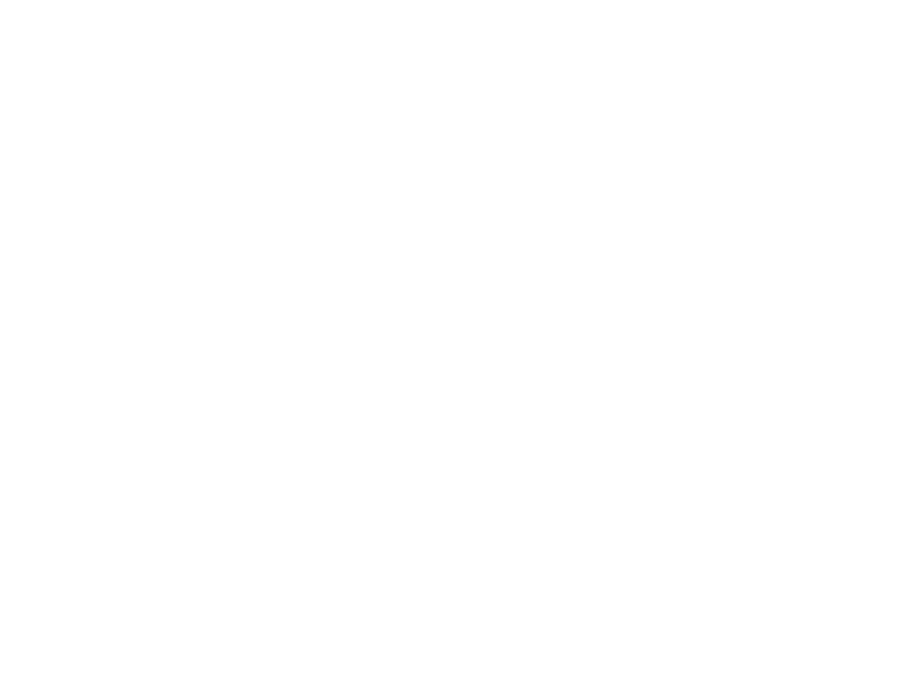

In [31]:
plotImage(18, 24243, butlerLamNoDark)

In [49]:
dataId = dict(visit=24243, arm='r', spectrograph=3)
exp = butlerLamNoDark.get('calexp', dataId)

In [57]:
exp.getImage().getArray()

array([[79334.11 , 79334.11 , 79334.11 , ..., 21499.986, 21545.611,
        21600.89 ],
       [79334.11 , 79334.11 , 79334.11 , ..., 21489.348, 21533.623,
        21590.352],
       [79334.11 , 79334.11 , 79334.11 , ..., 21484.379, 21526.12 ,
        21581.744],
       ...,
       [79334.11 , 79334.11 , 79334.11 , ..., 31576.957, 21299.883,
        21368.662],
       [79334.11 , 79334.11 , 79334.11 , ..., 31571.   , 21295.537,
        21368.924],
       [79334.11 , 79334.11 , 79334.11 , ..., 31571.084, 21296.262,
        21370.637]], dtype=float32)

In [32]:
butlerSNoDark = dafPersist.Butler('/projects/HSC/PFS/Subaru/rerun/hassans/r3glow/detrend-81424-nodark/')

lsst.CameraMapper INFO: Loading exposure registry from /projects/HSC/PFS/Subaru/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /projects/HSC/PFS/Subaru/CALIB/calibRegistry.sqlite3


/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


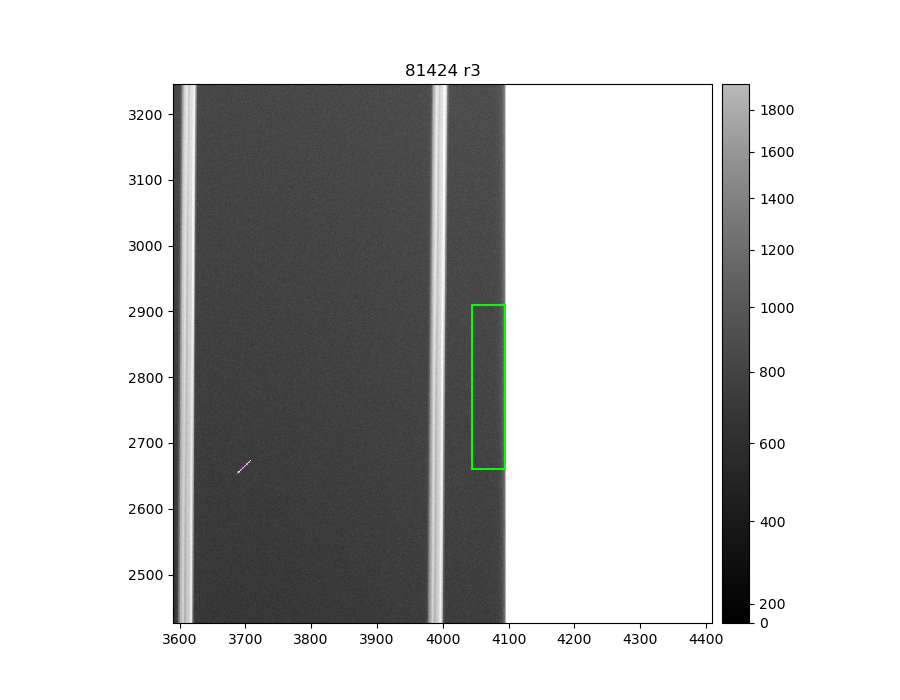

In [33]:
plotImage(19, 81424, butlerSNoDark)

In [46]:
def plotImage2(figNum, visit, butler=butler, type="calexp"):
    dataId = dict(visit=visit, arm='r', spectrograph=3)
    exp = butler.get(type, dataId)

    pfsConfig = butler.get("pfsConfig", dataId)
    detMap = butler.get("detectorMap", dataId)
    fig = figNum; plt.close(fig); fig = plt.figure(fig)
    disp = afwDisplay.Display(fig)
#     disp.scale('asinh', 'zscale', Q=2)
    disp.scale('linear', min=600, max=800)
    disp.mtv(exp, title=f"{'%(visit)d %(arm)s%(spectrograph)d' % dataId}")
    disp.zoom(10, colc=4000, rowc=2836)
    # [geom.BoxI(geom.PointI(4045, 2660), geom.PointI(4095, 2910))]
    disp.line([(4045,2660),(4045,2910),(4095,2910), (4095, 2660), (4045, 2660)])
    addPfsCursor(disp, detMap) 

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


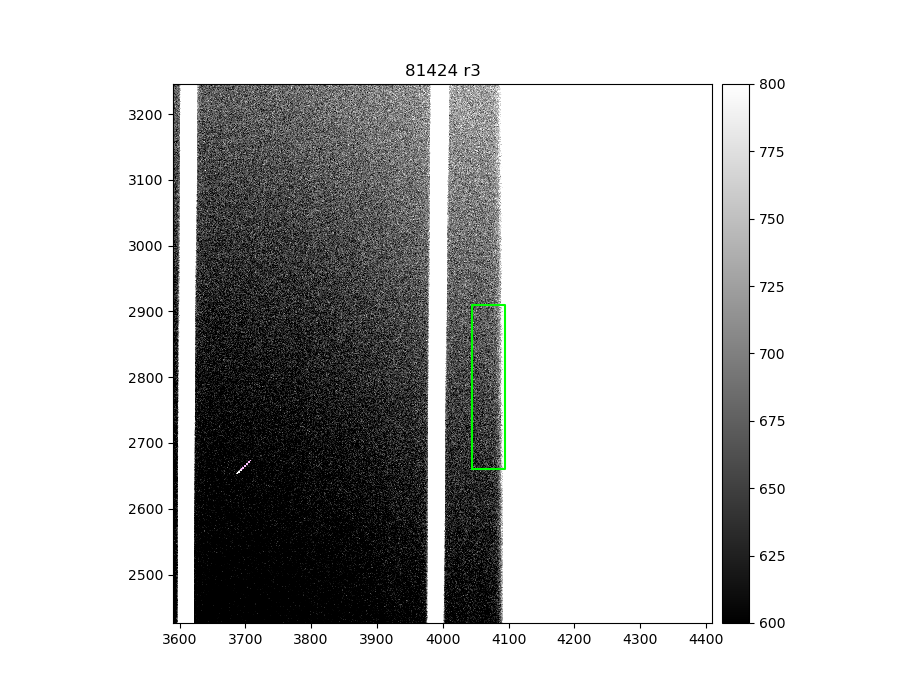

In [47]:
plotImage2(20, 81424, butlerSNoDark)

/projects/HSC/PFS/stack/20220525/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/drp_stella/w.2023.02/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


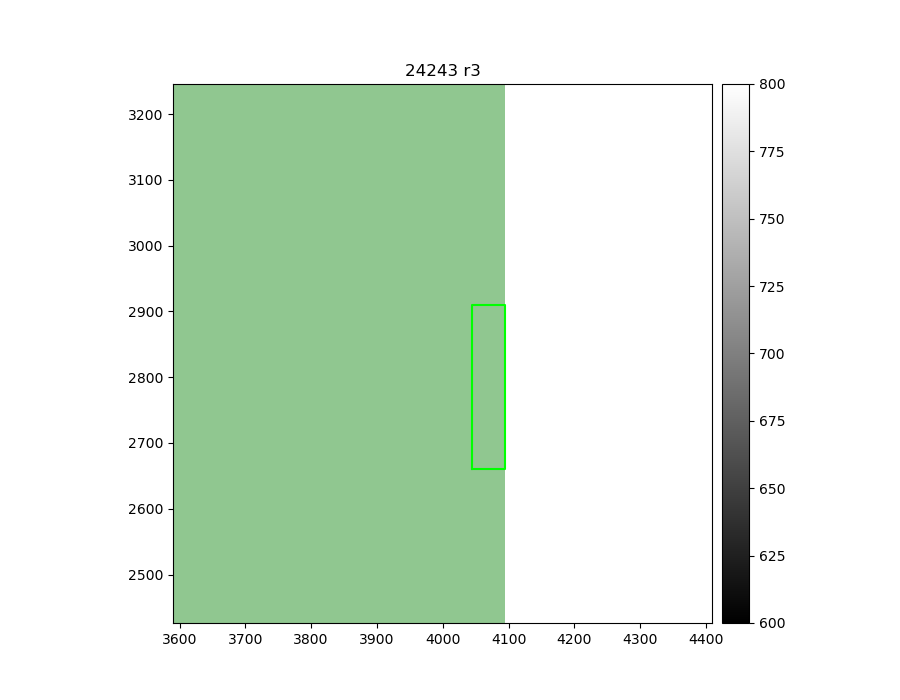

In [60]:
plotImage2(21, 24243, butlerLamNoDark)